K-Means

Import necessary libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Read Dataset

In [2]:
data = pd.read_csv(r'Data.csv', encoding='latin1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data = data.drop(columns=['InvoiceNo', 
                      'StockCode', 
                      'Description', 
                      'InvoiceDate',
                      'CustomerID',
                          'Country', 
                ])
data

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
541904,12,0.85
541905,6,2.10
541906,4,4.15
541907,4,4.15


In [5]:
data.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Quantity   541909 non-null  int64  
 1   UnitPrice  541909 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.3 MB


In [7]:
data.shape

(541909, 2)

In [8]:
data.duplicated().sum()

533515

In [9]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [10]:
missing = pd.DataFrame({
    'Total Missing': data.isnull().sum(),
    'Missing Percentage': (data.isnull().sum() / len(data)) * 100
})
missing

,Total Missing,Missing Percentage
Quantity,0,0.0
UnitPrice,0,0.0


## EDA

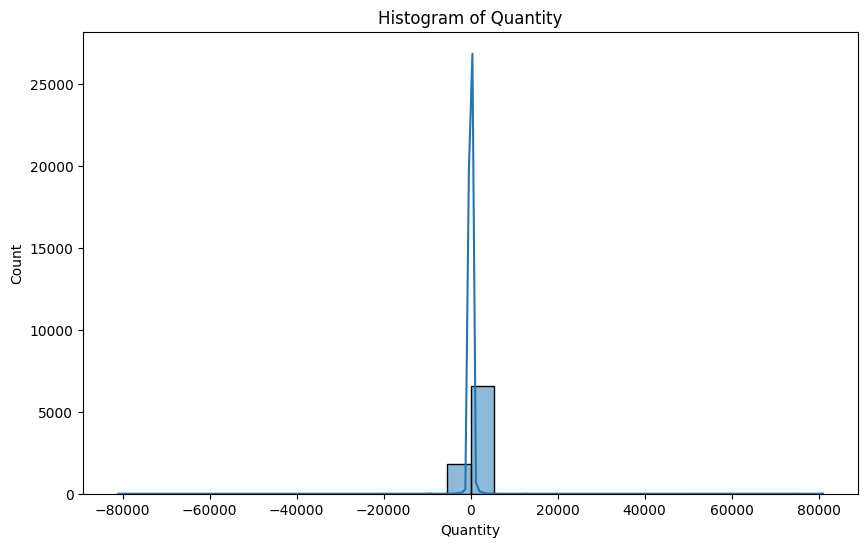

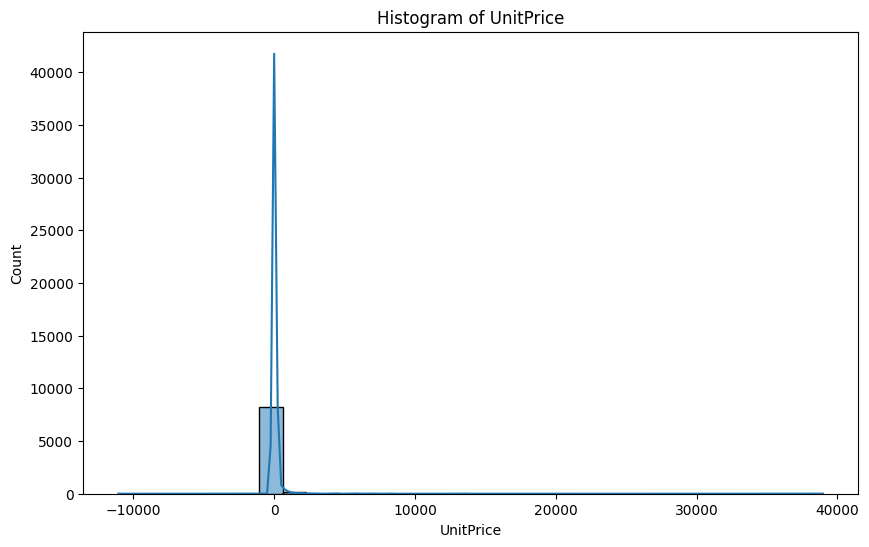

In [15]:
for col in data.columns:
    plt.figure(figsize=(10, 6))
    plt.title(f'Histogram of {col}')
    sns.histplot(data[col], bins=30, kde=True)
    plt.show()

## KMeans

#### Standardize data

In [16]:
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(data)
df

array([[-0.0248884 , -0.11106576],
       [-0.0248884 , -0.10993586],
       [-0.02373634, -0.11079674],
       ...,
       [ 0.00967347, -0.11398469],
       [ 0.05460389, -0.11011072],
       [ 0.02004203, -0.11343319]])

### Elbow Method

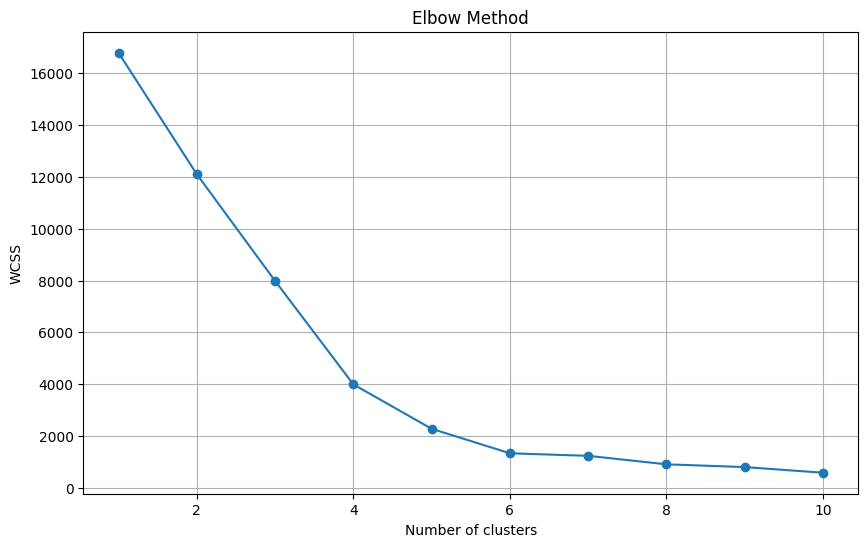

In [17]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    Kmeans = KMeans(n_clusters=i)
    Kmeans.fit(df)
    wcss.append(Kmeans.inertia_)  ## inertia_ is the WCSS
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')    
plt.title('Elbow Method')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
optimal_k = 4  # Replace with the optimal number of clusters from the elbow method

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df)  # Assigning clusters to the data points

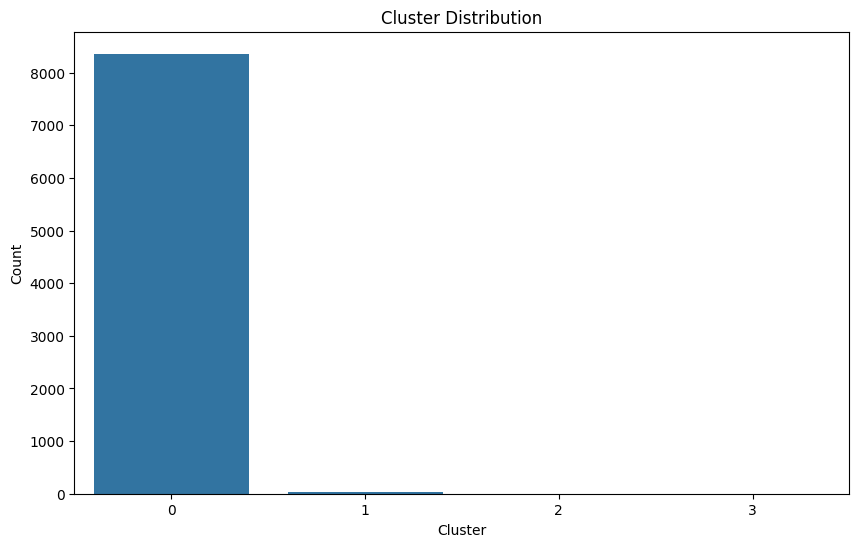

In [19]:
# countplot for cluster distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=clusters)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

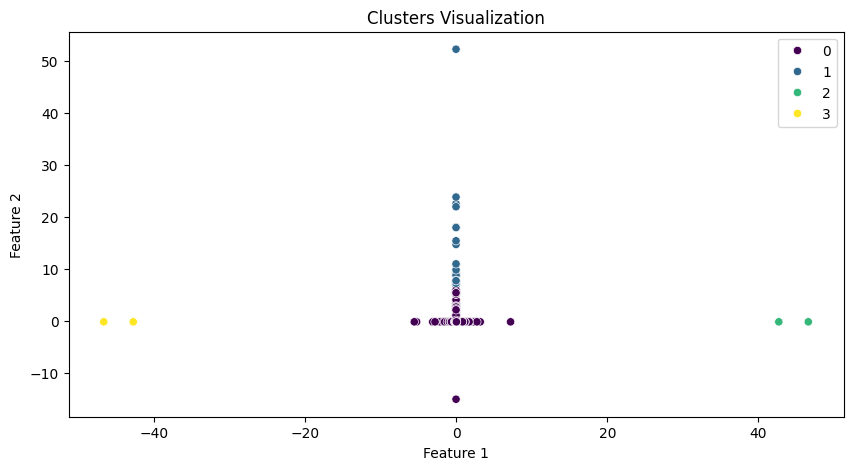

In [20]:
# scater plot for clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df[:, 0], y=df[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()